# External Fields

This notebook illustrates the use of EM external fields that can be superimposed in the simulatiuon. Adding an external field is done through the `emf.set_ext_fld()` method as exemplified below. Currently only two types of external fields are supported:

* "none" - no external field
* "uniform" - spatially uniform field

The external electric and magnetic fields can be set separately.

In [1]:
import em1d

import numpy as np

nx = 120
box = 4 * np.pi
dt = 0.1
tmax = 100.0

ppc = 500
ufl = [0.4,    0.0,  0.0]
uth = [0.001,0.001,0.001]

right = em1d.Species( "right", -1.0, ppc, ufl = ufl, uth = uth )

ufl[0] = -ufl[0]
left  = em1d.Species( "left", -1.0, ppc, ufl = ufl, uth = uth )

# Initialize the simulation without diagnostics
sim = em1d.Simulation( nx, box, dt, species = [right,left] )

# Add external fields
sim.emf.set_ext_fld( "uniform", B0 = [1.0,0.0,0.0])

# Run the simulation
sim.run( tmax )


Running simulation up to t = 100 ...
n = 1001, t = 100.1
Done.


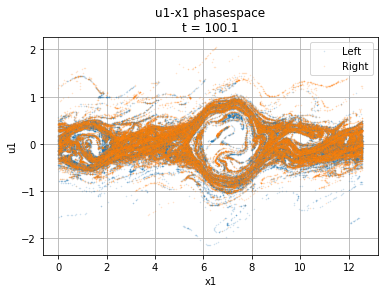

In [2]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx 

plt.plot(x(left),  left.particles['ux'],  '.', ms=1,alpha=0.2, label = "Left")
plt.plot(x(right), right.particles['ux'], '.', ms=1,alpha=0.2, label = "Right")
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.legend()
plt.grid(True)
plt.show()